In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [201]:
data = pd.read_csv("netflix_titles.csv")

In [202]:
data.shape

(6234, 12)

In [203]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [204]:
data.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [205]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [206]:
data.groupby('type').count()['show_id']

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64

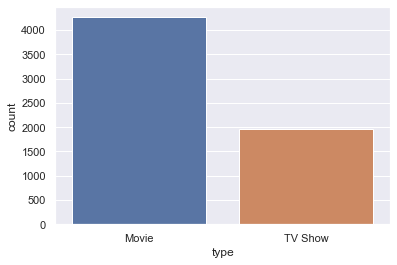

In [207]:
sns.set(style='darkgrid')
sns.countplot(data['type'])

### There are more number of movies as compared to shows

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

In [263]:
data['date_added'].isnull().count()

6234

In [264]:
data['date_added']= pd.to_datetime(data['date_added'])

In [265]:
data['year']=data['date_added'].dt.year


In [266]:
data['month'] =data['date_added'].dt.month

In [267]:
data['day']=data['date_added'].dt.day

In [268]:
data.groupby('year').count()['show_id']

year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0      12
2014.0      25
2015.0      90
2016.0     456
2017.0    1300
2018.0    1782
2019.0    2349
2020.0     184
Name: show_id, dtype: int64

In [ ]:
data[data['year']==2019.0 & data[]]

In [271]:
z = pd.DataFrame(z)

In [272]:
z.reset_index(inplace=True)

In [273]:
z[(z['year']==2019.0) & (z['type']=='TV Show')].sort_values(by='show_id')

,year,month,type,show_id
133,2019.0,1.0,TV Show,44
155,2019.0,12.0,TV Show,53
139,2019.0,4.0,TV Show,58
135,2019.0,2.0,TV Show,59
143,2019.0,6.0,TV Show,61
149,2019.0,9.0,TV Show,66
141,2019.0,5.0,TV Show,68
147,2019.0,8.0,TV Show,71
137,2019.0,3.0,TV Show,74
145,2019.0,7.0,TV Show,78


#### If you see in 2019 jan and dec very less number of tv shows were released thus this would be the best time to relaese the tv shows. 
#### Same can be done for other years and for movies as well


# Movie ratings analysis

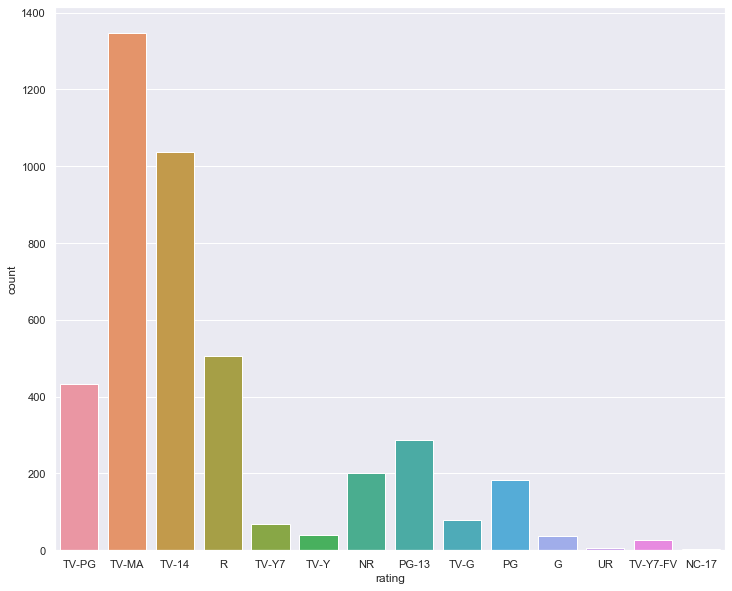

In [287]:
plt.figure(figsize=(12,10))
sns.countplot(x='rating',data=data[data['type']=='Movie'])
plt.show()

#### The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

#### Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

#### Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# Year wise analysis of movies

In [496]:
movies = data[(data['type']=='Movie')]

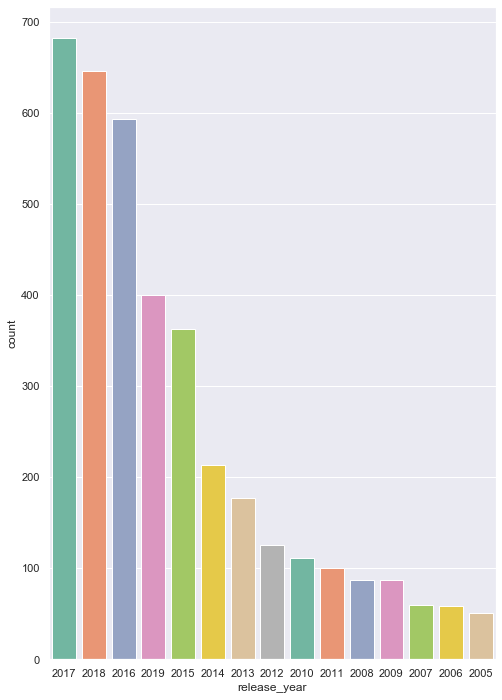

In [332]:
plt.figure(figsize=(8,12))
sns.countplot(x='release_year',data=movies,palette="Set2", order=movies['release_year'].value_counts().index[0:15])
plt.show()

In [333]:
#movies['release_year'].value_counts().index[0:15]

#### So, 2017 was the year when most of the movies were released.

# TOP 10 MOVIE CONTENT CREATING COUNTRIES

In [459]:
a = movies['country'].dropna(axis=0)

In [460]:
a =list(a)
b=[]
for i in a:
    b.append(i.split(','))
s=[]
for i in b:
    if len(i)>1:
        for j in i:
            s.append(j.strip())
    else:
        s.append(i[0].strip())

In [466]:
from collections import Counter
c=Counter(s)

In [467]:
countries = pd.DataFrame(c,index=['count']).T

<Figure size 576x864 with 0 Axes>

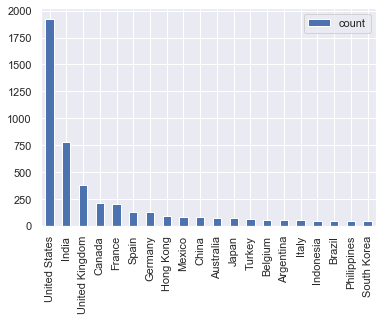

In [473]:
plt.figure(figsize=(8,12))
countries.sort_values(ascending=False,by='count')[0:20].plot(kind='bar')
plt.show()

# Analysis of duration of movies


In [501]:
movies['duration'] = movies['duration'].str.replace('min','')

C:\Users\Hemant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [502]:
movies['duration'] = movies['duration'].astype(int)

C:\Users\Hemant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


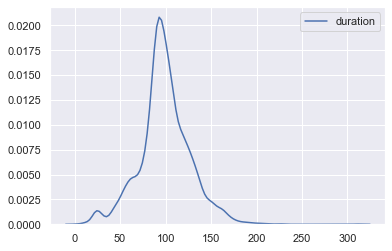

In [503]:
sns.set(style='darkgrid')
sns.kdeplot(data=movies['duration'])

#### So, a good amount of movies on Netflix are among the duration of 75-120 mins. 

# Movies based on their genres

In [506]:
generes  = list(movies['listed_in'])

In [509]:
gen =[]
for i in generes:
    i = i.split(',')
    if len(i)>1:
        for j in i:
            gen.append(j.strip())
    else:
        gen.append(i[0].strip())

In [516]:
c = Counter(gen)
generes= pd.DataFrame(c,index=['count']).T

<Figure size 576x864 with 0 Axes>

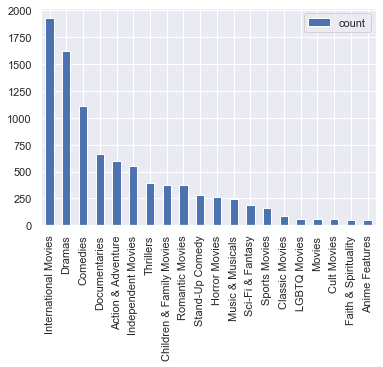

In [517]:
plt.figure(figsize=(8,12))
generes.sort_values(ascending=False,by='count')[0:20].plot(kind='bar')
plt.show()

#### Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Same above analysis can be done on Tv shows using the same codes

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Let check who all indain actors worked on netflix irrespective of movies and serials


In [520]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0


In [528]:
india = data[data['country']=='India'].dropna()

In [529]:
actor  = list(india['cast'])
act =[]
for i in actor:
    i = i.split(',')
    if len(i)>1:
        for j in i:
            act.append(j.strip())
    else:
        act.append(i[0].strip())

In [531]:
for i in act:
    print(i,end=',')

Ayushmann Khurrana,Nassar,Manoj Pahwa,Kumud Mishra,Isha Talwar,Sayani Gupta,Mohammed Zeeshan Ayyub,Subhrajyoti Barat,Sushil Pandey,Aakash Dabhade,Vishwaksen Naidu,Sushanth Reddy,Abhinav Gomatam,Venkatesh Kakumanu,Anisha Ambrose,Simran Choudhary,Aamir Khan,Anuskha Sharma,Sanjay Dutt,Saurabh Shukla,Parikshat Sahni,Sushant Singh Rajput,Boman Irani,Rukhsar,G.V. Prakash Kumar,Samyuktha Hegde,Suman,Raj Arjun,Yogi Babu,Munishkanth,Meezaan Jaffrey,Sharmin Segal,Chinmaya Surve,Anil Gawas,Sonal Jha,Sanjay Gurbaxani,Sameer Dharmadhikari,Deepak Damle,Samantha Ruth Prabhu,Lakshmi,Rajendraprasad,Naga Shourya,Rao Ramesh,Teja Sajja,Pragathi,Jagapathi Babu,Aishwarya,Urvashi,Samantha Ruth Prabhu,Lakshmi,Rajendraprasad,Naga Shourya,Rao Ramesh,Teja Sajja,Pragathi,Jagapathi Babu,Aishwarya,Urvashi,Nagarjuna Akkineni,Rakul Preet Singh,Lakshmi,Rao Ramesh,Vennela Kishore,Jhansi,Devadarshini Chetan,Nishanti,Manisha Koirala,Rajit Kapoor,Sanaj Naval,Rajendra Gupta,Suhaas Khandke,Nassar Abdulla,Saurabh Dubey,Usha 

,Aditya Lakhia,Ravi Gossain,Shabbir Ahluwalia,Akhilendra Mishra,Amrita Singh,Jayasurya,Vinayakan,Sunny Wayne,Vijay Babu,Saiju Kurup,Vineeth Mohan,Unni Rajan P. Dev,Dharmajan Bolgatty,Indrans,Sidharth Malhotra,Manoj Bajpayee,Rakul Preet Singh,Pooja Chopra,Adil Hussain,Kumud Mishra,Naseeruddin Shah,Anupam Kher,Vikram Gokhale,Juhi Babbar,Shah Rukh Khan,Naseeruddin Shah,Urmila Matondkar,Malvika Tiwari,Shammi Kapoor,Deven Verma,Tinnu Anand,Anjana Mumtaz,Anjan Srivastav,Rakesh Bedi,Shah Rukh Khan,Suchitra Krishnamoorthi,Deepak Tijori,Rita Bhaduri,Satish Shah,Anjan Srivastav,Goga Kapoor,Tiku Talsania,Ravi Baswani,Naseeruddin Shah,Shah Rukh Khan,Juhi Chawla,Vivek Mushran,Pankaj Kapur,Puneet Issar,Tinnu Anand,Deven Verma,Gulshan Grover,Amrit Pal,Arun Bali,Rani Mukerji,Prithviraj Sukumaran,Nirmiti Sawant,Subodh Bhave,Jyoti Subhash,Satish Alekar,Anita Date,Amey Wagh,Kishori Balal,Pakoda Pandi,Amitabh Bachchan,Hema Malini,Raveena Tandon,Sonu Sood,Sonal Chauhan,Charmy Kaur,Prakash Raj,Makrand Deshp

Sheela Rajkumar,Sethu Darwin,Anand Sampath,Karuna Prasad,Roshan,Priyaa Lal,Aadukalam Naren,Singam Puli,Meera Krishnan,Jayaprakash,Heeba Shah,Ashwin Shukla,Muskaan,Aldan Shaikh,Ayesha,Irrfan Khan,Jimmy Shergill,Vishesh Bansal,Tushar Dalvi,Nitish Pandey,John Abraham,Diya Chalwad,Shruti Haasan,Nishikant Kamat,Sharad Kelkar,Nathalia Kaur,Amitabh Bachchan,Nawazuddin Siddiqui,Vidya Balan,Mukesh Chhabra,Sabyasachi Chakraborty,Prakash Belawadi,Tota Roy Chowdhury,Padmavati Rao,Suneel Sinha,Kajal Aggarwal,Nithya Menon,Regina Cassandra,Eesha Rebba,Murli Sharma,Srinivas Avasarala,Priyadarshi Pullikonda,Deepak Subramanya,Apoorva Soma,Ramesh Bhat,Harsha H S,Karthik A,Goutham Shashidhar,Nagshree Karkone,Moksha Kushal,Vedashree Rao,Prashant Prakash,Kalki Koechlin,Prakash Raj,Gulshan Devaiah,Valeriya Polyanychko,Kareena Kapoor,Rahul Bose,Rinke Khanna,Yashpal Sharma,Makrand Deshpande,Kabir Sadanand,Pankaj Jha,Ranvir Shorey,Gul Panag,Purab Kohli,Neil Bhoopalam,Gunjan Bakshi,Saurabh Shukla,Atul Kumar,Brij

<Figure size 576x864 with 0 Axes>

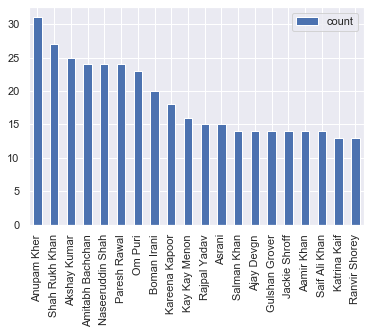

In [533]:
from collections import Counter
c=Counter(act)
actors = pd.DataFrame(c,index=['count']).T
plt.figure(figsize=(8,12))
actors.sort_values(ascending=False,by='count')[0:20].plot(kind='bar')
plt.show()

### Same way it can be done for other countries as well

# Top 10 Directors with most number of movie

In [535]:
directors = data.dropna()

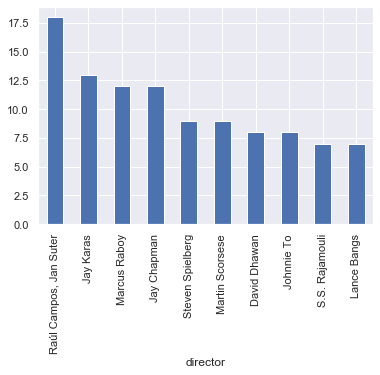

In [545]:
directors.groupby('director')['show_id'].count().sort_values(ascending=False)[0:10].plot(kind='bar')

# Thank you